<a href="https://colab.research.google.com/github/soobin2121/ML_EDU/blob/master/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 드라이브에 저장해놓은 파일 불러오는 방법

참고: https://chloevan.github.io/settings/colab_drive_github_settings/

In [49]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from IPython.core.display import display, HTML
from pandas_profiling import ProfileReport

In [50]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
%cd drive/'My Drive'/'Colab Notebooks'/'BOSTON_HOUSING'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/BOSTON_HOUSING'
/content/drive/My Drive/Colab Notebooks/BOSTON_HOUSING


In [52]:
%ls

sample_submission.csv  test.csv  train.csv


In [53]:
import pandas as pd
from pandas.io import gbq
# import train file 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


### 에러 처리

BOSTON DATA 3개 -	submission(0) - train, test(x)

변수명 = 숫자로 시작하는 변수명

에러: Invalid field name "1stFlrSF"



In [54]:
colnames_dict = {"1stFlrSF": "my1stFlrSF", "2ndFlrSF": "my2ndFlrSF", "3SsnPorch": "my3SsnPorch"} 
train = train.rename(columns=colnames_dict)

In [55]:
train.to_gbq(destination_table='Boston_housing.train',
                  project_id='bigquerytutorial2121', 
                  if_exists='replace')

1it [00:04,  4.49s/it]


In [56]:
colnames_dict = {"1stFlrSF": "my1stFlrSF", "2ndFlrSF": "my2ndFlrSF", "3SsnPorch": "my3SsnPorch"} 
test = test.rename(columns=colnames_dict)

In [57]:
test.to_gbq(destination_table='Boston_housing.test',
                  project_id='bigquerytutorial2121', 
                  if_exists='replace')

1it [00:03,  3.94s/it]


In [58]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [59]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,my1stFlrSF,my2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,my3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## train의 numeric 데이터만 추출하기

In [60]:
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.columns)
print("The total number of numeric features are: ", len(numeric_features.columns))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'my1stFlrSF', 'my2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'my3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The total number of numeric features are:  38


우선 훈련데이터의 ID는 삭제한다.

또한, 종속변수인 salesprice는 테스트 데이터에는 존재하지 않는다.

그럼 결과적으로 36개의 numeric_features만 남게 된다.

36개의 features만 남았다.

여기에서 유심히 살펴보면 Year과 관련된 features가 보인다.

특히 매출과 관련된 데이터를 다루는데 있어서, 연,월,일은 매우 중요하다. 

패턴을 찾아서 특정 변수만 추출하는 코드가 필요하다.

## YearBuilt, YearRemodAdd, GarageYrBlt, YrSold만 추출해보자.

In [61]:
year_fea = [fea for fea in numeric_features if 'Yr' in fea or 'Year' in fea]       #year_fea 는 list
print(year_fea)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [86]:
train.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [68]:
%matplotlib inline       
import matplotlib.pylab as plt

## 간단한 그래프 해석

 - 처음 설계된 것은 1872년, 리모델링 시작은 1950년, 매매는 2006~2010년


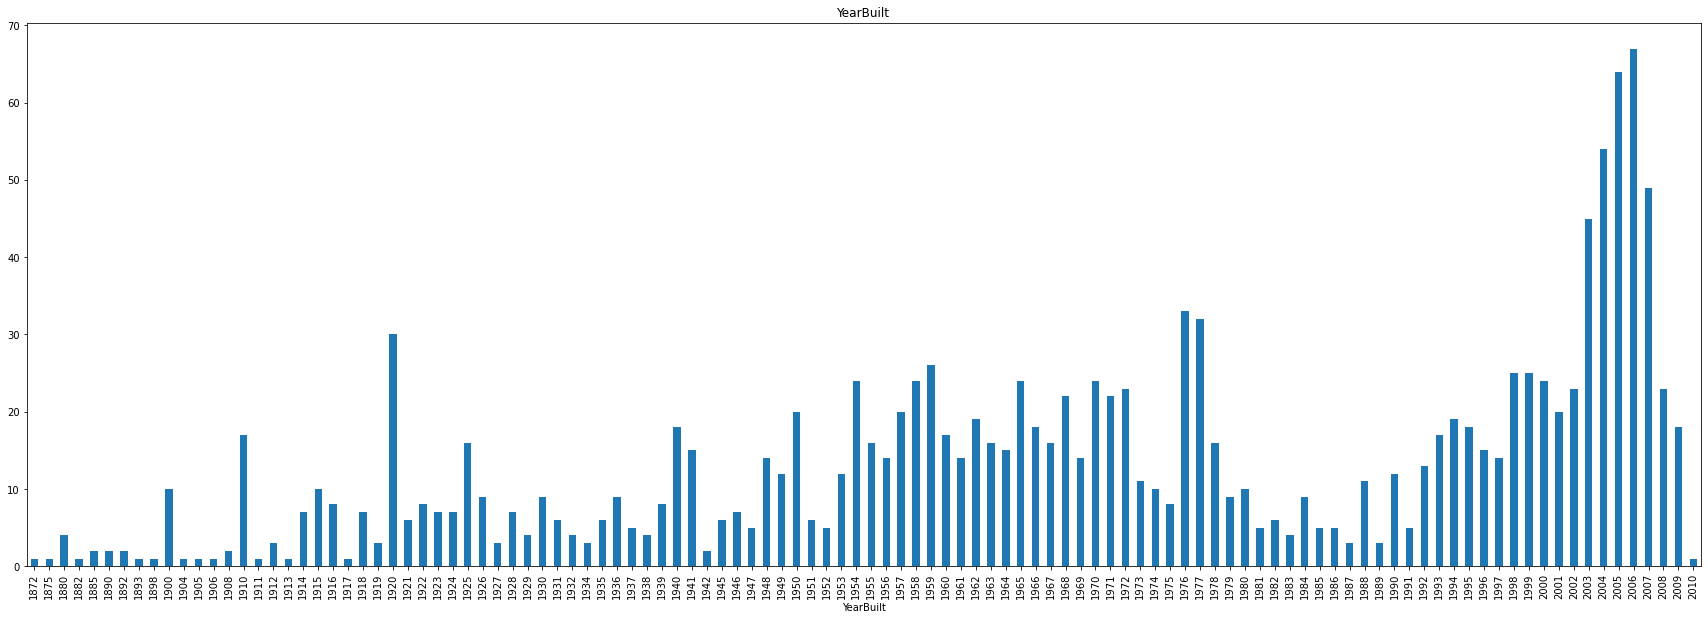

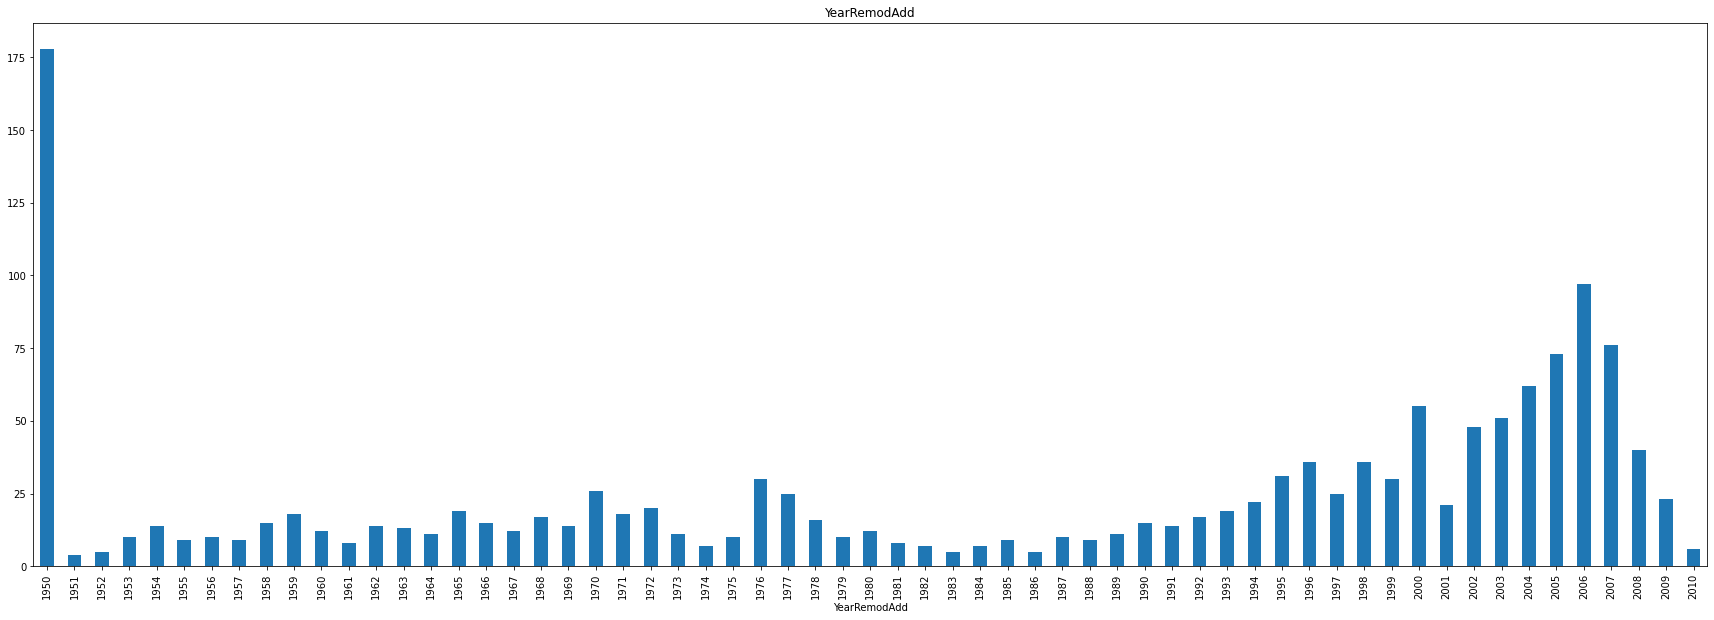

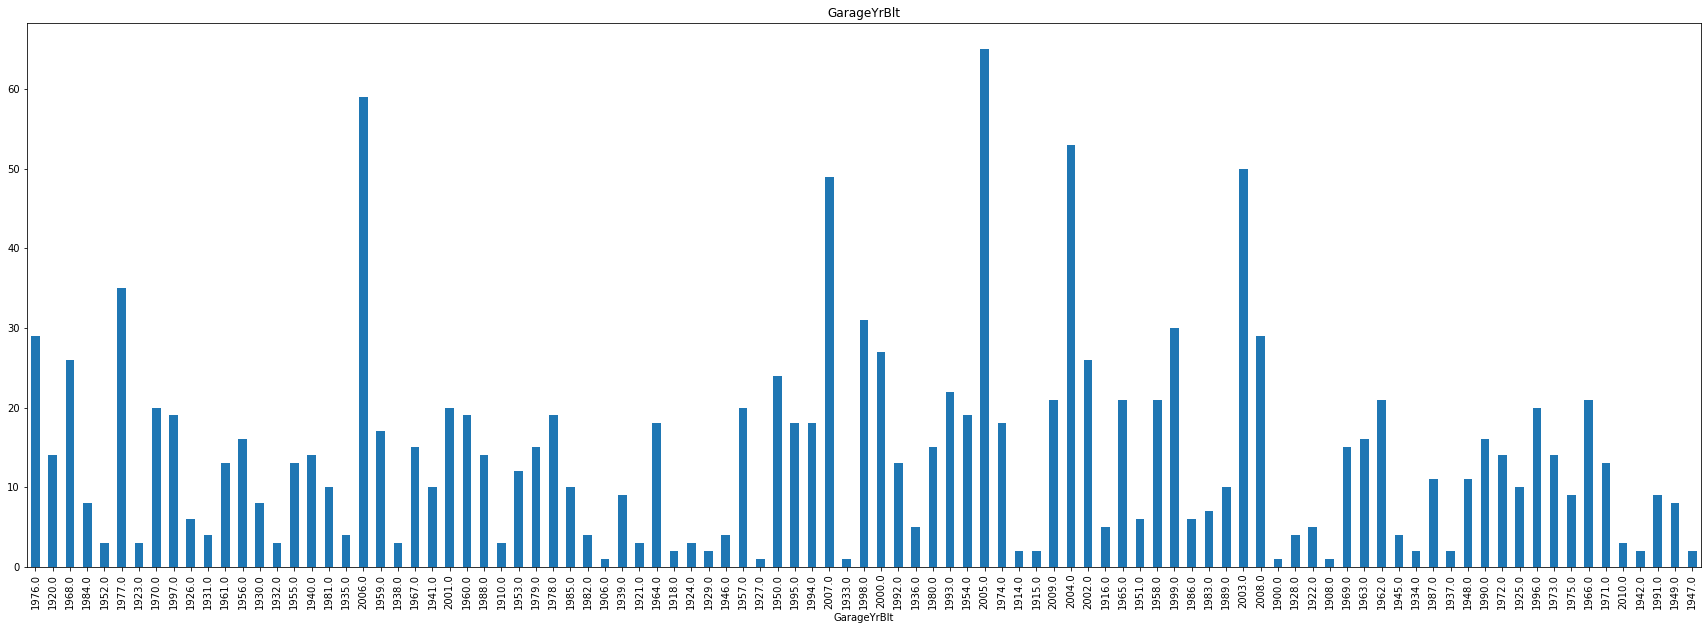

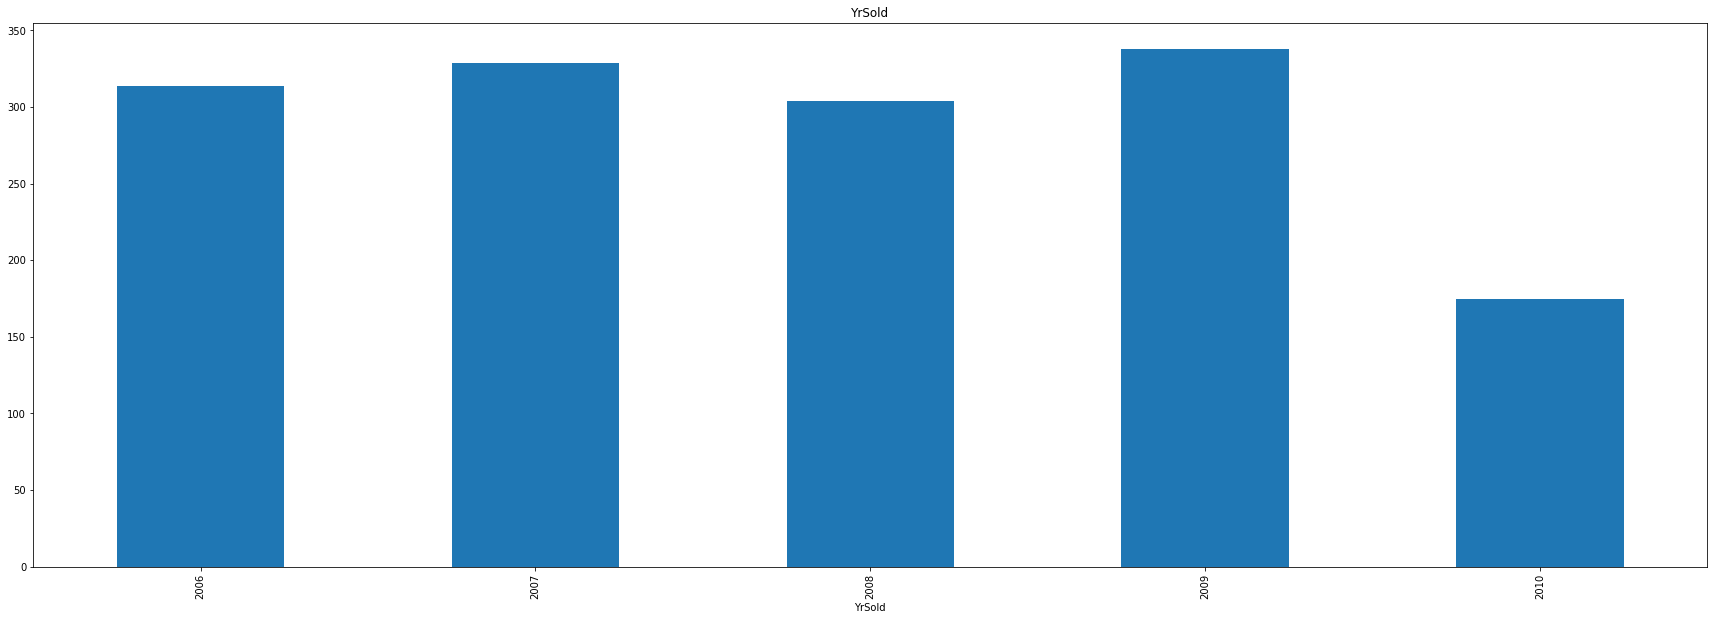

In [71]:
for fea in year_fea:
  data = train.copy()
  data[fea].value_counts(sort=False).plot(kind='bar', figsize= (30,10))
  plt.xlabel(fea)
  plt.title(fea)
  plt.show()

## 종속변수와의 관계(SalePrice와의 관계)

- YrSold에서 그 외 다른 변수와의 연도 시기의 차이를 계산하면 통상적으로 연수가 짧으면 짧을수록 매매가도 올라가고 연수가 길면 길수록 매매가가 하락하는 것을 예상할 수 있다.


In [91]:
data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

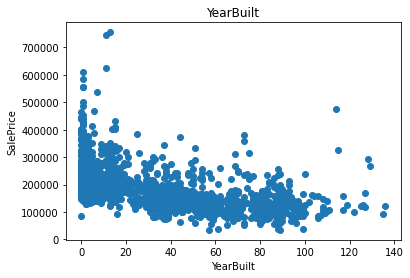

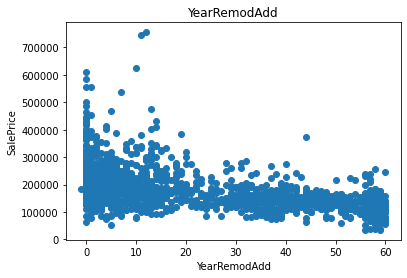

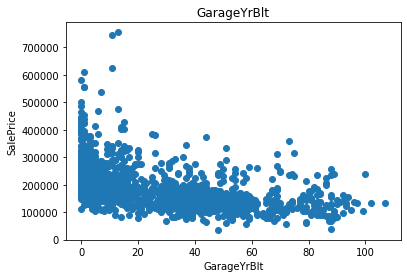

In [87]:
for fea in year_fea:
    if fea!='YrSold':                                     # `YrSold` 변수는 제외 한다.
        data=train.copy()                                 # 이렇게 해주는 것이 좋다. (원본 데이터는 늘 보존할 수 있다)
        data[fea]=data['YrSold']-data[fea]                #  여기가 사실 핵심 포인트다. 연수 차이 계산
        plt.scatter(data[fea], data['SalePrice'])         # 산점도 그래프를 그린다.
        plt.title(fea)
        plt.xlabel(fea)
        plt.ylabel('SalePrice')
        plt.show()

# 이산형 데이터
양적변수에는 크게 2가지의 변수가 존재

- 이산형(Discrete) 변수: 인원수, 개수 등

- 연속형(Continuous) 변수: 온도, 키, 몸무게, 소득 등

###  예시:  가상 데이터 생성 (number_of_room은 방의 개수, sales_price는 매매가격)

In [92]:
temp = pd.DataFrame({'id' : [1,2,3,4,5,6,7,8,9,10],
                    'number_of_room' : [2,4,3,2,4,3,3,3,4,2],
                    'SalePrice' : [1000,1300,2000,1030,2030,2050,2000,5000,3000,3500]
                    })
print(temp)

   id  number_of_room  SalePrice
0   1               2       1000
1   2               4       1300
2   3               3       2000
3   4               2       1030
4   5               4       2030
5   6               3       2050
6   7               3       2000
7   8               3       5000
8   9               4       3000
9  10               2       3500


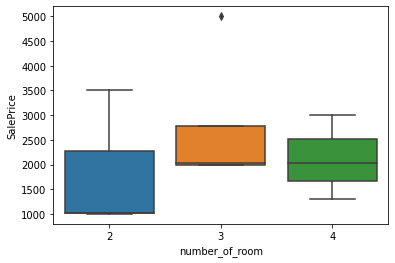

<Figure size 2880x2160 with 0 Axes>

In [98]:
sns.boxplot(x = "number_of_room", y = "SalePrice", data = temp)
plt.figure(figsize=(40,30))
plt.show()

##numeric_features에서 연속형 데이터와 이산형 데이터를 구분

- unique()함수 사용. 

즉 유일한 값을 뽑는데, 그 개수가 50개 이상이면 연속형으로 보고,

그 이하면 discrete로 판단한다.

이 때, year_fea와 id는 같이 제거한다.


In [100]:
discrete_vars=[fea for fea in numeric_features if len(train[fea].unique()) < 50 and fea not in year_fea + ['Id']]

print("Discrete Variables Count: {}".format(len(discrete_vars)))

Discrete Variables Count: 17


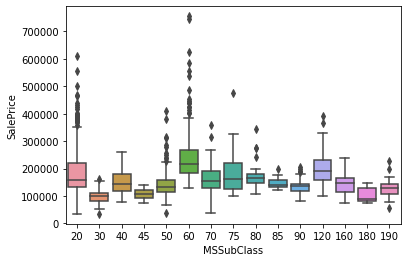

<Figure size 2160x432 with 0 Axes>

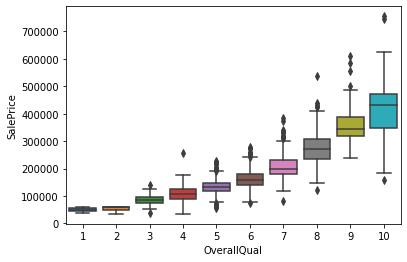

<Figure size 2160x432 with 0 Axes>

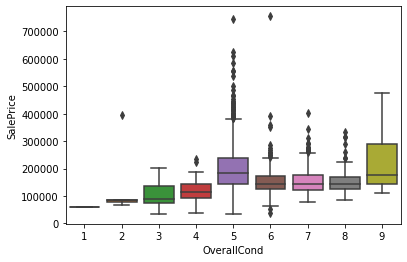

<Figure size 2160x432 with 0 Axes>

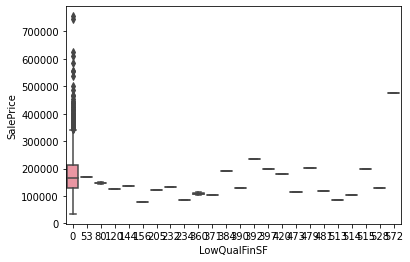

<Figure size 2160x432 with 0 Axes>

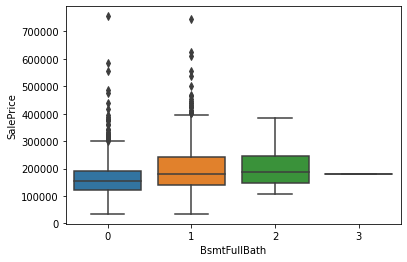

<Figure size 2160x432 with 0 Axes>

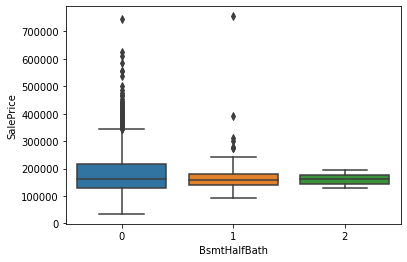

<Figure size 2160x432 with 0 Axes>

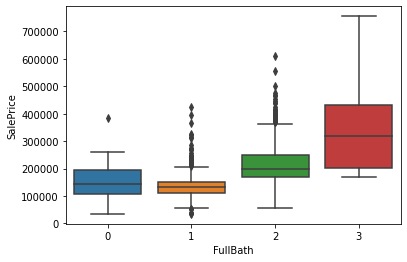

<Figure size 2160x432 with 0 Axes>

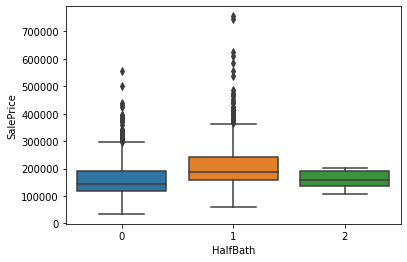

<Figure size 2160x432 with 0 Axes>

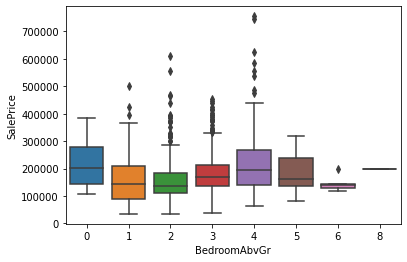

<Figure size 2160x432 with 0 Axes>

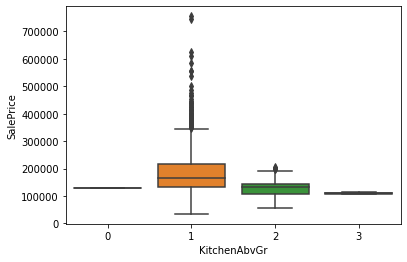

<Figure size 2160x432 with 0 Axes>

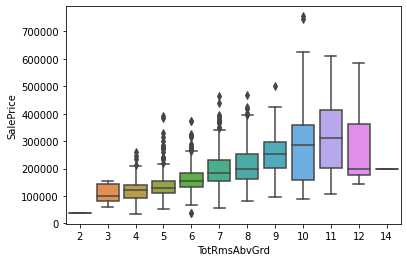

<Figure size 2160x432 with 0 Axes>

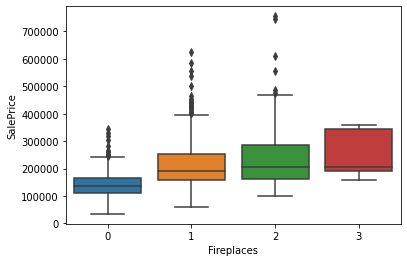

<Figure size 2160x432 with 0 Axes>

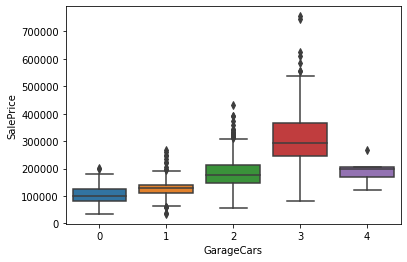

<Figure size 2160x432 with 0 Axes>

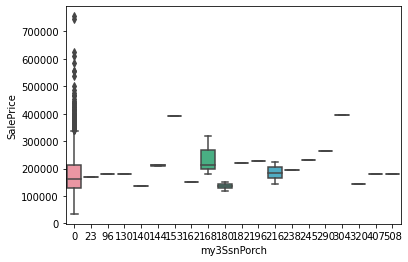

<Figure size 2160x432 with 0 Axes>

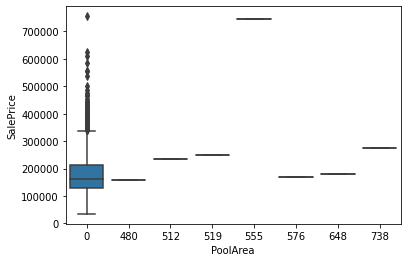

<Figure size 2160x432 with 0 Axes>

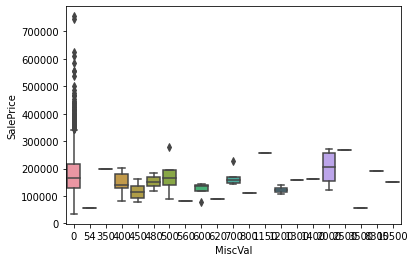

<Figure size 2160x432 with 0 Axes>

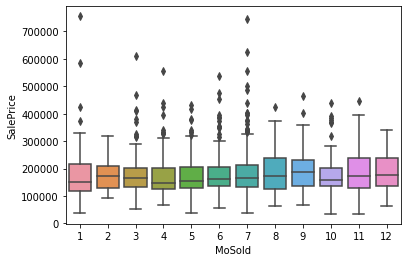

<Figure size 2160x432 with 0 Axes>

In [108]:
rem_vars = ['PoolArea', 'LowQualFinSF', 'MiscVal', '3SsnPorch']    # 불필요한 데이터는 제거


for fea in discrete_vars:
  data = train.copy()
  sns.boxplot(x = fea, y='SalePrice', data = data)
  plt.figure(figsize=(30,6))
  plt.show()